# Introduction

In statistics, linear regression is a approach for modelling a linear relationship between a dependent (**y**) and one or more independent (**x**) variables. In supervised machine learning, it is the simplest statistical regression method used for predictive analysis.

Linear regression in general is presented as follows:

$$
y_{pred}(m, x) = c + m_1 x_1 + ... + m_n x_n
$$

If the number of independent variables is one, then it is called simple linear regression and is reduced to the following form:

$$
y_{pred}(m, x) = c + m x
$$

Where,
- **m** is the **slope/coefficient**
- **c** is the **intercept/constant**

In order to determine the regression line (i.e. the values of **slope(m)** and **intercept(c)**) that best fits the dataset, a **cost (or error) function** is used. In simple terms, a cost function compares the actual with the predicted values and returns an error value. Hence, the equation with the lowest error is chosen as the best fit. 


The most common cost function used to fit linear models is **Mean Square Error (MSE)**. **MSE** measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.

$$
MSE = \frac{\sum_{i=1}^{N}(y_a-y_{pred})^2} {N}
$$

In this notebook, we will see how to fit a simple linear regression on a dataset using 3 different methods:
- **Method 1** - pure maths
- **Method 2** - raw computational power
- **Method 3** - existing Machine Learning library (Scikit-Learn)

# Basic Setup

In [52]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Creating an independent variable **x** consisting of 101 data points between 0 and 10.

In [53]:
x = np.linspace(0, 10, num=101)
x[:5]

array([0. , 0.1, 0.2, 0.3, 0.4])

Creating a dependent variable **y** such that:

$$
Y = 2X + 5 + \epsilon \\
\epsilon = Noise
$$

In [56]:
# creating the noise or error
E = np.random.uniform(low = 0, high = 1, size=101)
E[:5]

array([0.36981404, 0.76354856, 0.63127675, 0.11761146, 0.18233246])

In [57]:
# creating the dependant variable
y = 2*x + 5 + E
y[:5]

array([5.36981404, 5.96354856, 6.03127675, 5.71761146, 5.98233246])

Plotting the data points to get visual impression of the dataset

In [58]:
import seaborn as sns

[]

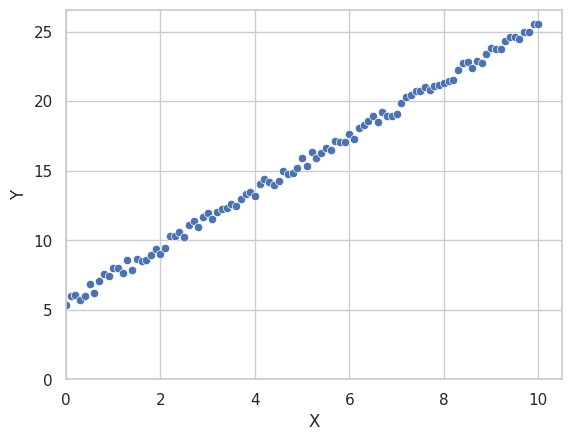

In [59]:
sns.set(style="whitegrid")
sns.scatterplot(x = x, y = y, color = "b")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0,)
plt.ylim(0,)
plt.plot()

Clearly, it looks like the **X** and **Y** are linearly related.

# Method 1 - Pure Maths

In this method, basic statistics, calculus and algebra will be used to determine the **slope(m)** and **intercept(c)** and hence, to create the linear equation. The pictures below show the derivation steps.

In [60]:
from IPython.display import Image

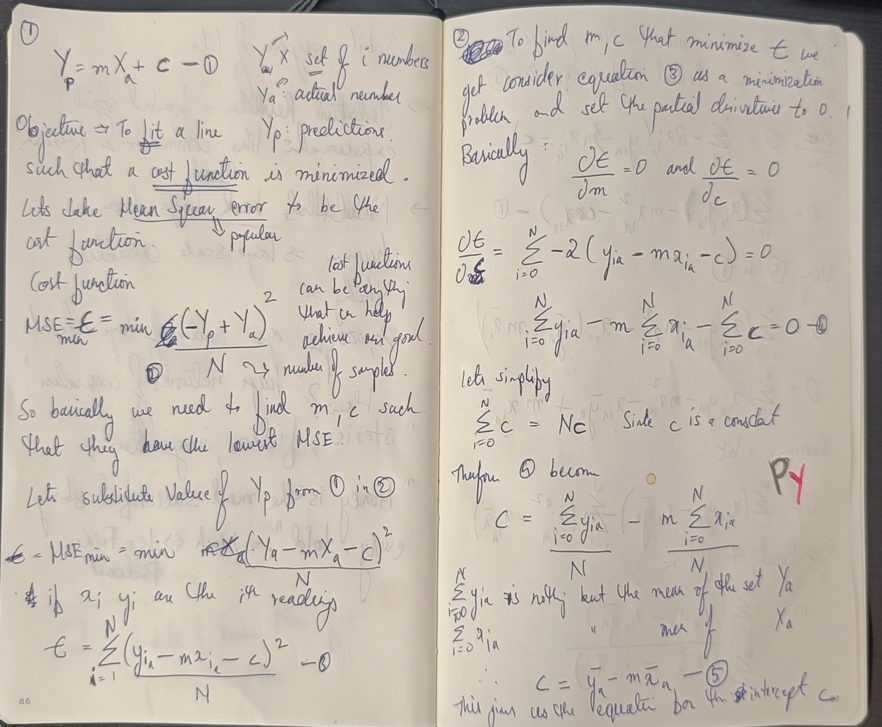

In [61]:
Image(filename='dev_1.png')

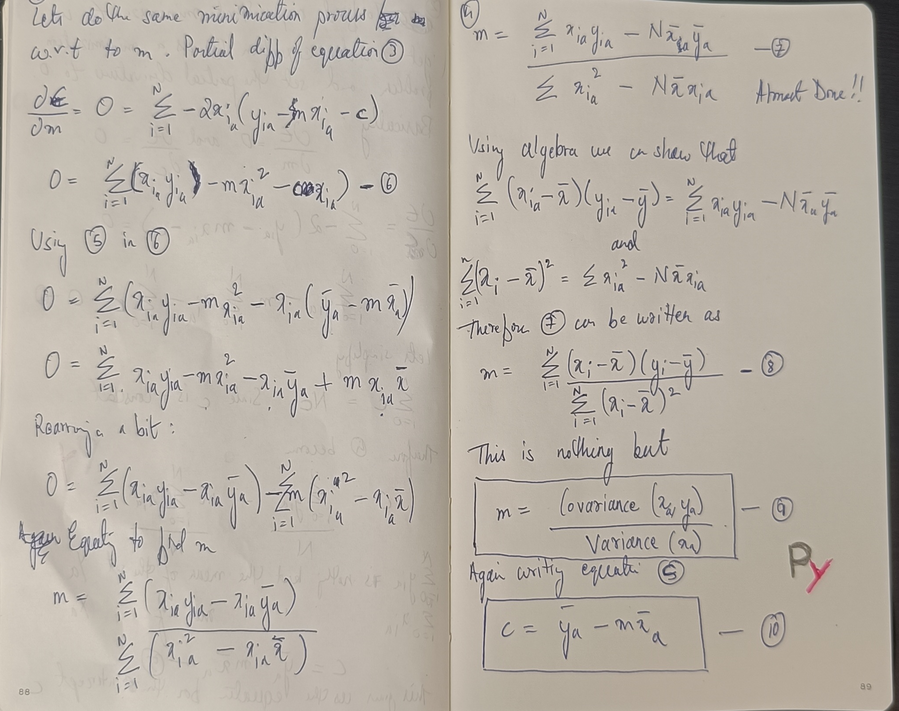

In [62]:
Image(filename='dev_2.png')

Lets use equations **9** and **10** from above to compute the **slope(m)** and the **intercept(c)** of the linear regression line that fits the dataset well and has the least error (MSE).

In [63]:
# mean of independent and dependent variables
x_mean = x.sum()/len(x)
y_mean = y.sum()/len(y)
print(x_mean)
print(y_mean)

5.0
15.537371629618782


In [64]:
# variance of x
x_variance = sum(abs(x - x_mean)**2)/len(x)
y_variance = sum(abs(y - y_mean)**2)/len(y)
print(x_variance)
print(y_variance)

8.500000000000002
34.07333343333448


In [65]:
# calculating covariance
xy_covariance = sum((x - x_mean) * (y - y_mean))/len(x)
print(xy_covariance)

16.999204403259192


Using equation **9** to calculate the **slope(m)**

$$
Slope(m) = \frac{Covariance(xy)} {Variance(x)}
$$

In [66]:
m = xy_covariance/x_variance
print(m)

1.999906400383434


Inserting the value of the **slope(m)** in equation **10** to calculate the **intercept(c)**

$$
Intercept(c) = y_{mean} - mx_{mean}
$$

In [67]:
c = y_mean - m * x_mean
print(c)

5.537839627701613


Finally, the fitted linear model as the follows:

In [68]:
print(f'y = {m}*x + {c}')

y = 1.999906400383434*x + 5.537839627701613


Now lets use the above equation to make predictions and compare it with the actual dependent variable **y**

In [69]:
# creating the function to help with predictions
def _linear_model(a): # a = x (independant variable)
    b = m * a + c # b = y (dependant variable)
    return b

In [70]:
# using the above function to predict
y_pred = _linear_model(x)
y_pred[:5]

array([5.53783963, 5.73783027, 5.93782091, 6.13781155, 6.33780219])

Plotting actuals (in blue) and the linear regression line (in red)

[]

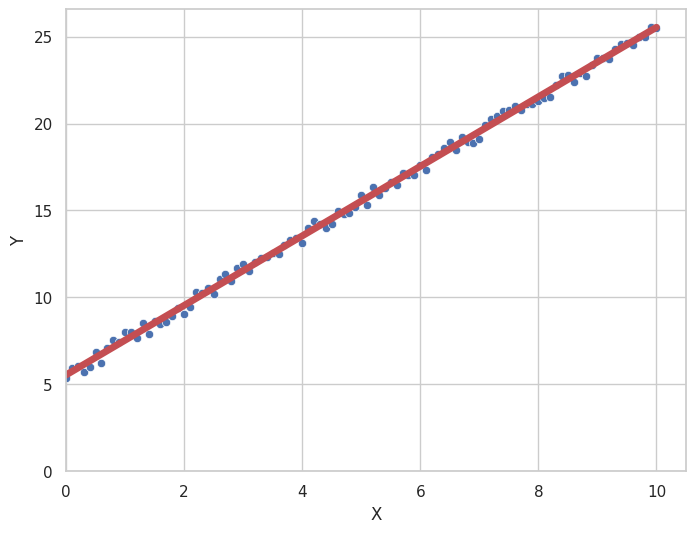

In [72]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6)) 

sns.scatterplot(x = x, y = y, color = "b")
sns.lineplot(x = x, y = y_pred, color = "r", linewidth=5)

plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0,)
plt.ylim(0,)
plt.plot()

Visually, the line seems to be a good fit for the dataset.

Lets calculate the **MSE** and **Coefficient of Determination(R²)** to check the goodness of the fit. 

$$
MSE = \frac{\sum_{i=1}^{N}(y_a-y_p)^2} {N}
$$

$$
R^2 = 1-\frac{\sum_{i=1}^{N}(y_a-y_p)^2} {\sum_{i=1}^{N}(y_a-y_{mean})^2}
$$

In [73]:
# calculating the mean square error
mse_1 = sum((y - y_pred)**2) / len(y)
print(f'MSE = {mse_1}')

# calculating the coeff of determination
r2_score_1 = 1 - sum((y - y_pred)**2) / sum((y - y_mean)**2)
print(f'R2 = {r2_score_1}')

MSE = 0.07651574583016131
R2 = 0.9977543803872355


A low **MSE** and a **R²** close to one shows the linear model is a good fit.

# Method 2 - Computational Power

In this method, instead of deriving equations to solve for **slope(m)** and the **intercept(c)**, we will simply use the raw computational power to iterate through different values of **m** and the **c** and choose the values with the lowest **MSE**.

In [74]:
# creating a cost function that calculates the MSE
def cost_function(x, y, b0, b1):
    # MSE formula
    error = sum((b1*x + b0 - y)**2)/len(x)
    return error

In [75]:
# A function that iterates through multiple values of m and c
# Returning the m and c values with the lowest mse
def optimization(slice):
    steps = np.linspace(0,10, num=slice + 1) # splicing the numbers between 1 and 10
    #initial setup
    error = 100
    b0 = 0
    b1 = 0
    for i in steps: # b0 = intercept
        for h in steps: #b1 = slope
            error_updated = cost_function(x, y, i, h)
            if error_updated < error:
                b0 = i
                b1 = h
                error = error_updated
    return error, b0, b1


Lets first plug in [0, 1, 2,..10] for **m** and **c**. This is equal to running the inner *for loop* of the above function for 10*10 = 100 times.

In [76]:
mse_2, c, m = optimization(10)
print(f'y = {m}*x + {c}')
print(f'MSE = {mse_2}')

y = 2.0*x + 6.0
MSE = 0.2905408293792917


Due to the low number of iterations, the created linear regression line is a poor fit and therefore has a higher **MSE**.

Now lets plug in [0.0, 0.1, 0.2 ... 9.9, 10.0] for **m** and **c**. This is equal to running the inner *for loop* of the above function for 100*100 = 10,000 times.

In [77]:
mse_2, c, m = optimization(100)
print(f'y = {m}*x + {c}')
print(f'MSE = {mse_2}')

y = 2.0*x + 5.5
MSE = 0.07791245899807465


Finally lets plug in [0.00, 0.01, 0.02 ... 9.99, 10.00] for **m** and **c**. This is equal to running the inner *for loop* of the above function for 1000*1000 = 1,000,000 times.

In [78]:
mse_2, c, m = optimization(1000)
print(f'y = {m}*x + {c}')
print(f'MSE = {mse_2}')

y = 2.0*x + 5.54
MSE = 0.07652272862857187


As you can see, the linear regression model is fitting the dataset better.

 # Method 3 - Using the Scikit-Learn Library

In this method we will use the already prepared LinearRegression module from Scikit-Learn to perform regression.

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [80]:
# creating an instance of the model
lm = LinearRegression()

In [81]:
# fitting the model to the dataset
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
lm.fit(x,y)

LinearRegression()

In [82]:
# showing the trained model
print(f'y = {lm.coef_[0][0]}*x + {lm.intercept_[0]}')

y = 1.9999064003834344*x + 5.53783962770161


In [83]:
# predicting using the 
y_pred = lm.predict(x)

In [84]:
y_pred[:5]

array([[5.53783963],
       [5.73783027],
       [5.93782091],
       [6.13781155],
       [6.33780219]])

In [85]:
mse_3 = mean_squared_error(y, y_pred)
r2_score_3 = r2_score(y, y_pred)
print(f'MSE = {mse_3}')
print(f'R2 = {r2_score_3}')

MSE = 0.07651574583016121
R2 = 0.9977543803872355
